# Text Classification using Multinomial Naive Bayes, Neural Network, and Vectorization

This project deals with text classification using Multinomial Naive Bayes, Neural Networks, and vector visualization. In this project, TF-IDF Vectorization is utilized.

# Text Classification

This part deals with the 20 News Group Dataset. TF-IDF vectorization is implemented from scratch and Multinomial Naive Bayes Classification is executed on the News Group Dataset.

In [ ]:
# Import the libraries

import numpy as np
import string
import math
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import pandas as pd
import re
from nltk.tokenize import  word_tokenize 
import nltk
nltk.download('punkt')
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

[nltk_data] Downloading package punkt to /Users/pshah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Import the 20 news group dataset utilizing sklearn library

mydata_train = fetch_20newsgroups(subset='train', remove=['headers', 'footers', 'quotes'])
mydata_test = fetch_20newsgroups(subset='test', remove=['headers', 'footers', 'quotes'])

In [ ]:
# Print the news groups(target) in the dataset

pprint(list(mydata_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [ ]:
# Inspecting the type of 'mydata_train' and 'mydata_test'

print(type(mydata_train))
print(type(mydata_test))

<class 'sklearn.utils.Bunch'>
<class 'sklearn.utils.Bunch'>


In [ ]:
# Check the length of the data

print(len(mydata_train.data))
print(len(mydata_train.filenames))
print(len(mydata_test.data))
print(len(mydata_test.filenames))

11314
11314
7532
7532


In [ ]:
text = mydata_train.data
test = mydata_test.data

# Preprocessing the Corpus

In [ ]:
# Preprocessing the data

lines = [] 
word_list = [] 
for line in text:
    
    # Tokenize the text documents and update the lists word_list and lines
    
    x = [i.lower() for  i in word_tokenize(line) if i.isalpha()]
    lines.append(x)
    for word in x:
        if word not in word_list:
            word_list.append(word)

# Make sure the word_list contains unique tokens

word_list = set(word_list)

# Calculate the total documents present in the corpus

total_docs = len(lines)
 
# Create a dictionary to keep track of index of each word

dict_idx = {}
i = 0
for word in word_list:
    dict_idx[word] = i
    i += 1

# Extracting Features from the Dataset

In [ ]:
# Create a frequency dictionary
 
def frequency_dict(lines):
    """
    Input:
      lines: list containing all the tokens
    Output:
      freq_word: returns a dictionary which keeps the count of the number of documents containing the given word
    """

    freq_word = {}
    for word in word_list:
        freq_word[word] = 0
        for line in lines:
            if word in line:
                freq_word[word] += 1

    return freq_word

In [ ]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function

freq_word = frequency_dict(lines)
freq_word

{'proposer': 2,
 'gradualism': 1,
 'heatofmoment': 1,
 'declare': 27,
 'provision': 15,
 'ganging': 1,
 'couples': 9,
 'jamsa': 1,
 'isotropic': 3,
 'pursuant': 6,
 'us': 1019,
 'subjectiveness': 1,
 'betwwwn': 1,
 'ajl': 1,
 'deconvolution': 1,
 'salesmen': 3,
 'garron': 1,
 'zeven': 1,
 'agrees': 18,
 'merrier': 1,
 'wiley': 8,
 'bradly': 1,
 'talk': 231,
 'colect': 1,
 'cass': 1,
 'ats': 1,
 'vechorik': 2,
 'fertile': 7,
 'bilinsky': 1,
 'alto': 6,
 'sympathies': 6,
 'rotate': 21,
 'arcas': 1,
 'filename': 20,
 'groans': 1,
 'fumbling': 1,
 'rim': 4,
 'piscataway': 1,
 'sabr': 1,
 'desjardins': 6,
 'badasian': 1,
 'somethong': 2,
 'coordinate': 18,
 'neighbours': 11,
 'hovannisian': 5,
 'ijg': 1,
 'anoushiravani': 1,
 'critisise': 1,
 'keskinen': 1,
 'crushed': 10,
 'modo': 5,
 'banging': 3,
 'flourecse': 1,
 'lingo': 2,
 'saddle': 6,
 'qicstream': 1,
 'sampex': 1,
 'pierrepoint': 1,
 'cinch': 1,
 'mdxp': 1,
 'meetinsg': 1,
 'replies': 100,
 'bikeless': 1,
 'suburbs': 7,
 'basket': 

# Implement TF-IDF Vectorization from scratch

The model cannot simply read the text data, so it's converted into the numerical format. In order to convert the data into the numerical format, vectors are created from the text. For this particular purpose, TF-IDF Vectorization is employed. The TF-IDF model contains information on the more important words and the less important ones as well. TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, gives a higher weight to words that occur less frequently.

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document. The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

In [ ]:
# Function to calculate the Term Frequency

def term_frequency(document, word):
    """
    Input:
      document: list containing the entire corpus
      word: word whose term frequency is to be calculated
    Output:
      tf: returns term frequency value
    """

    occurance = len([token for token in document if token == word])
    tf = occurance/len(document)
    
    return tf

In [ ]:
# Function to calculate the Inverse Document Frequency
 
def inverse_df(word):
    """
    Input:
      word: word whose inverse document frequency is to be calculated
    Output:
      idf: return inverse document frequency value
    """

    try:
        word_occurance = freq_word[word] + 1
    except:
        word_occurance = 1
    idf = np.log(total_docs/word_occurance)

    return idf

In [ ]:
# Function to combine the term frequencies (TF) and inverse document (IDF) frequencies calculated above to get TF-IDF

def tfidf(sentence,dict_idx):
    """
    Input:
      sentence: list containing the entire corpus
      dict: dictionary keeping track of index of each word
    Output:
      tf_idf_vec: returns computed tf-idf
    """

    tf_idf_vec = np.zeros((len(word_list),))
    for word in sentence:
        tf = term_frequency(sentence,word)
        idf = inverse_df(word)
        value = tf*idf
        tf_idf_vec[dict_idx[word]] = value

    return tf_idf_vec

In [ ]:
# Compute the vectors utilizing the 'tfidf' function created above to obtain a TF-IDF Encoded text corpus

vectors = []
for sent in lines:
    vec = tfidf(sent, dict_idx)
    vectors.append(vec)

# Multinomial Naive Bayes

In [ ]:
# Fit a Multinomial Naive Bayes Model on the dataset

model = MultinomialNB(alpha=0.01).fit(vectors, mydata_train.target)

In [ ]:
# Perform testing on the train dataset

pred = model.predict(vectors)

In [ ]:
# Calculate the F1 Score and the Accuracy

F1_score = metrics.f1_score(mydata_train.target, pred, average='micro')
Accuracy = metrics.accuracy_score(mydata_train.target, pred)
print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)

F1 Score:  0.9526250662895528
Accuracy:  0.9526250662895528


# Vector Visualization

In this unsupervised learning task, Wikipedia articles will be clustered into groups using T-SNE visualization after vectorization.

# Collect articles from Wikipedia

Download the articles from Wikipedia and then vectorize them.

In [ ]:
# install libraries

%pip install wikipedia

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import wikipedia
from wikipedia.exceptions import WikipediaException

# selected topics

topics = ["Boston", "Football", "Walt disney", "Emirates (airline)", "Oceanic climate", "School"]

# list of articles to be downloaded

articles = []
for topic in topics:
    articles.extend(wikipedia.search(topic, results=6))

# download and store articles (summaries) in this variable

data=[]
for article in articles:
    data.append(wikipedia.summary(article))

# Cleaning the data

In [ ]:
import re
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()

def clean_text(text):

    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    
    return text

i = 0
for text in data:
    data[i] = clean_text(text)
    i += 1

[nltk_data] Downloading package punkt to /Users/pshah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/pshah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Vectorize the articles

Vectorize the text data, using TfidfVectorizer() and countVectorizer().

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data)
X.shape

(36, 2182)

# Plot articles

Verify the groups of articles using T-SNE.

In [ ]:
from sklearn.manifold import TSNE

z = TSNE(n_components=2).fit_transform(X)

/Users/pshah/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/pshah/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Plot and annotate the points with different markers for different expected groups.

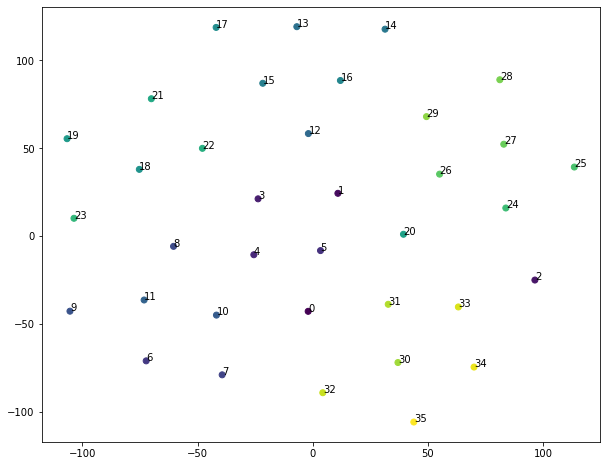

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(10,8))
c = list(range(0, 36))
xs = z[:,0]
ys = z[:,1]
plt.scatter(xs, ys, c=c)
for i, label in enumerate(c):
    plt.annotate(label, (xs[i], ys[i]))
plt.show()

# Neural Networks

Emotions Dataset is used to classify the given text into different kind of emotions like happy, sad, anger, love, surprise and fear.

# Library Imports and Utility functions

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
nltk.download('omw-1.4')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())

def clean_text(text):

    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    
    return text

[nltk_data] Downloading package stopwords to /Users/pshah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/pshah/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /Users/pshah/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/pshah/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Importing the datasets

In [ ]:
# Import train.txt into pandas dataframe train

train = pd.read_csv("train.txt", sep=";", header=None, names=['sentence', 'emotion'])

# Import val.txt into pandas dataframe validation

validation = pd.read_csv("val.txt", sep=";", header=None, names=['sentence', 'emotion'])

# Shape of train and validation

print("Train Shape: ", train.shape)
print("Validation Shape: ", validation.shape)

Train Shape:  (16000, 2)
Validation Shape:  (2000, 2)


# Clean the text

In [ ]:
# Clean the text in the train and validation dataframes

i = 0
for text in train['sentence']:
    train['sentence'][i] = clean_text(text)
    i += 1

j = 0
for text in validation['sentence']:
    validation['sentence'][j] = clean_text(text)
    j += 1

# Convert the text into vectors

In [ ]:
# initialise count vectorizer

vectorizer = CountVectorizer()

# fit_transform on train dataset and transform on validation dataset

X_train_counts = vectorizer.fit_transform(train['sentence'].tolist()).toarray()
X_val_counts = vectorizer.transform(validation['sentence'].tolist()).toarray()

In [ ]:
# initialise tfidf vectorizer

tf_idf = TfidfVectorizer()

# fit_transform on train dataset and transform on validation dataset

X_train_tf = tf_idf.fit_transform(train['sentence'].tolist()).toarray()
X_val_tf = tf_idf.transform(validation['sentence'].tolist()).toarray()

In [ ]:
# initialise label encoder

le = preprocessing.LabelEncoder()

# fit on train labels and transform both train and validation labels

train['emotion'] = le.fit_transform(train['emotion'].tolist())
validation['emotion'] = le.transform(validation['emotion'].tolist())

In [ ]:
# convert the labels into one hot encoding form

train_emotions = train['emotion'].values
onehot_encoded_y_train = pd.get_dummies(train_emotions)
y_train = onehot_encoded_y_train.values

val_emotions = validation['emotion'].values
onehot_encoded_y_val = pd.get_dummies(val_emotions)
y_val = onehot_encoded_y_val.values

# Build the Neural Network model and evaluate it on different metrics

In [ ]:
# Build the model

import tensorflow as tf
from tensorflow.keras import regularizers

tf.random.set_seed(42)

def build_model(X):

  inp = tf.keras.Input((X.shape[1],))

  x = tf.keras.layers.Dense(2048, input_dim = X.shape[1] , activation = 'relu')(inp)

  x = tf.keras.layers.Dropout(.1)(x)

  x = tf.keras.layers.Dense(1024, activation = 'tanh', kernel_regularizer=regularizers.l2(0.001))(x)

  x = tf.keras.layers.Dropout(.2)(x)

  x = tf.keras.layers.Dense(512, activation = 'tanh', kernel_regularizer=regularizers.l2(0.001))(x)

  x = tf.keras.layers.Dropout(.5)(x)
  
  x = tf.keras.layers.Dense(256, activation = 'tanh', kernel_regularizer=regularizers.l2(0.001))(x)

  x = tf.keras.layers.Dropout(.5)(x)

  x = tf.keras.layers.Dense(128, activation = 'tanh', kernel_regularizer=regularizers.l2(0.001))(x)

  x = tf.keras.layers.Dropout(.5)(x)

  x = tf.keras.layers.Dense(6, activation = 'softmax')(x)

  model = tf.keras.Model(inp, x)

  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.RMSprop(), metrics = [tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), 'accuracy'])

  return model

In [ ]:
# Initialize the model

model = build_model(X_train_counts)

2022-06-19 12:07:00.071245: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-19 12:07:00.072236: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [ ]:
# Train and validate the model on the count vectors of text

history = model.fit(X_train_counts, y_train, batch_size=8, epochs=10, validation_data=(X_val_counts, y_val))

Train on 16000 samples, validate on 2000 samples
Epoch 1/10
16000/16000 [==============================] - 465s 29ms/sample - loss: 1.6074 - auc: 0.9195 - precision: 0.7763 - recall: 0.6255 - accuracy: 0.6950 - val_loss: 0.8092 - val_auc: 0.9682 - val_precision: 0.8545 - val_recall: 0.8190 - val_accuracy: 0.8345
Epoch 2/10
16000/16000 [==============================] - 454s 28ms/sample - loss: 0.5334 - auc: 0.9847 - precision: 0.9077 - recall: 0.8896 - accuracy: 0.8977 - val_loss: 0.5403 - val_auc: 0.9812 - val_precision: 0.8943 - val_recall: 0.8760 - val_accuracy: 0.8835
Epoch 3/10
16000/16000 [==============================] - 430s 27ms/sample - loss: 0.4046 - auc: 0.9897 - precision: 0.9293 - recall: 0.9161 - accuracy: 0.9222 - val_loss: 0.4897 - val_auc: 0.9841 - val_precision: 0.9018 - val_recall: 0.8905 - val_accuracy: 0.8970
Epoch 4/10
16000/16000 [==============================] - 449s 28ms/sample - loss: 0.3500 - auc: 0.9921 - precision: 0.9413 - recall: 0.9324 - accuracy: 0.9

# Plot the evaluation metrics

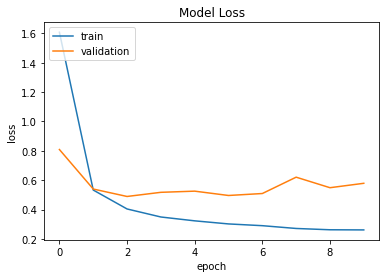

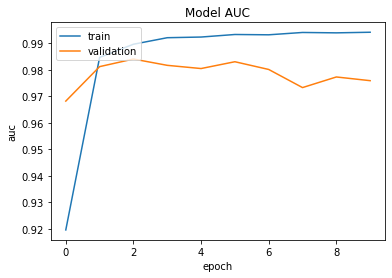

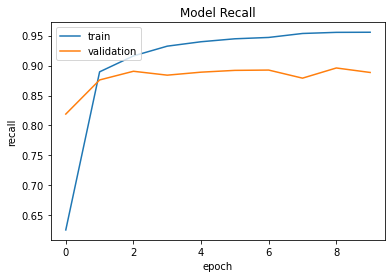

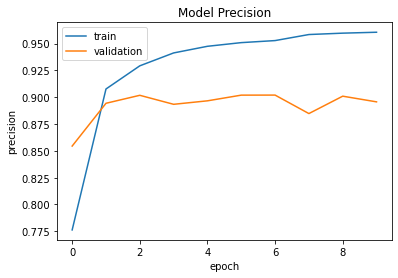

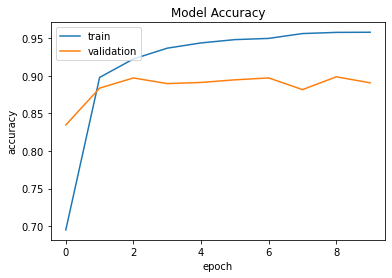

In [ ]:
# Plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Re-initialize the model

model = build_model(X_train_tf)

In [ ]:
# Train and validate the model on the tfidf vectors of text

history = model.fit(X_train_tf, y_train, batch_size=8, epochs=10, validation_data=(X_val_tf, y_val))

Train on 16000 samples, validate on 2000 samples
Epoch 1/10
16000/16000 [==============================] - 416s 26ms/sample - loss: 1.3527 - auc_1: 0.9168 - precision_1: 0.7847 - recall_1: 0.5748 - accuracy: 0.6716 - val_loss: 0.7604 - val_auc_1: 0.9666 - val_precision_1: 0.8418 - val_recall_1: 0.7875 - val_accuracy: 0.8130
Epoch 2/10
16000/16000 [==============================] - 430s 27ms/sample - loss: 0.5396 - auc_1: 0.9828 - precision_1: 0.8995 - recall_1: 0.8731 - accuracy: 0.8853 - val_loss: 0.5674 - val_auc_1: 0.9794 - val_precision_1: 0.8887 - val_recall_1: 0.8660 - val_accuracy: 0.8760
Epoch 3/10
16000/16000 [==============================] - 400s 25ms/sample - loss: 0.4053 - auc_1: 0.9887 - precision_1: 0.9297 - recall_1: 0.9139 - accuracy: 0.9219 - val_loss: 0.5507 - val_auc_1: 0.9798 - val_precision_1: 0.8927 - val_recall_1: 0.8740 - val_accuracy: 0.8835
Epoch 4/10
16000/16000 [==============================] - 396s 25ms/sample - loss: 0.3635 - auc_1: 0.9901 - precision_1:

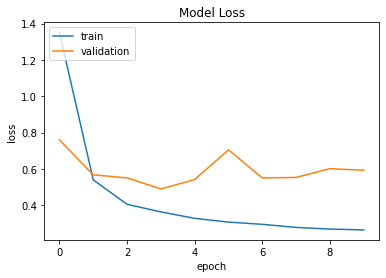

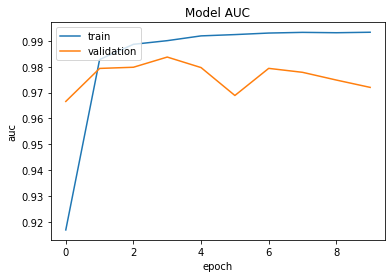

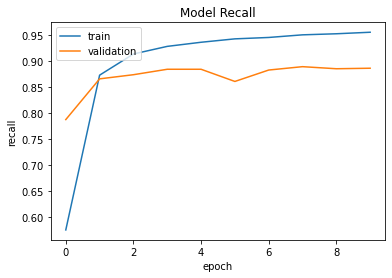

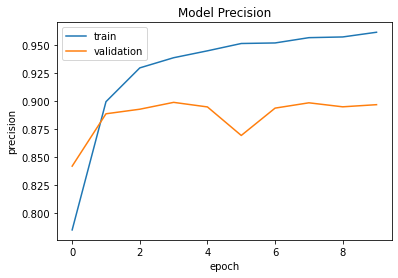

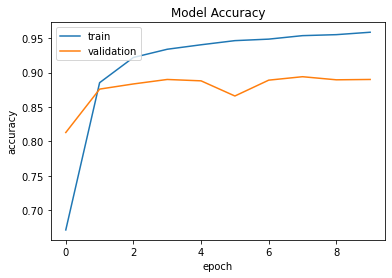

In [ ]:
# Plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['auc_1'])
plt.plot(history.history['val_auc_1'])
plt.title('Model AUC')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['recall_1'])
plt.plot(history.history['val_recall_1'])
plt.title('Model Recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['precision_1'])
plt.plot(history.history['val_precision_1'])
plt.title('Model Precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()